In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Error calculation

After training the model, we can do validation on the validation dataset, by comparing model result and validation target.

In example, we use rmse (root mean square error).

rmse = sqrt( sum((output - target)^2) / number_of_data )



In [66]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [67]:
df = pd.read_csv(data)

In [68]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [69]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [70]:
# try predicting MSRP using Year, Engine Cylinders, highway MPG, city mpg

df = df[['Year', 'Engine Cylinders', 'highway MPG', 'city mpg', 'MSRP']].copy()

In [71]:
df.head(3)

,Year,Engine Cylinders,highway MPG,city mpg,MSRP
0,2011,6.0,26,19,46135
1,2011,6.0,28,19,40650
2,2011,6.0,28,20,36350


In [72]:
df.dropna(inplace=True)

In [73]:
# shuffle the data
idx = np.arange(len(df))
np.random.seed(2)
np.random.shuffle(idx)

n_test = int(len(df)*0.2)
n_val = int(len(df)*0.2)
n_train = len(df) - n_test - n_val


In [74]:
df_train = df.iloc[idx[:n_train]]

# df_val = idx n_train..n_train+n_val
df_val = df.iloc[idx[n_train:n_train + n_val]]

# df_test = idx n_train+n_val..end
df_test = df.iloc[idx[n_train + n_val:]]

print(len(df_train), len(df_val), len(df_test))

7132 2376 2376


In [75]:
# split features and target
X_train = df_train[['Year', 'Engine Cylinders', 'highway MPG', 'city mpg']].values
y_train = df_train['MSRP'].values

X_val = df_val[['Year', 'Engine Cylinders', 'highway MPG', 'city mpg']].values
y_val = df_val['MSRP'].values

X_test = df_test[['Year', 'Engine Cylinders', 'highway MPG', 'city mpg']].values
y_test = df_test['MSRP'].values


In [ ]:
# convert target value to log1p
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [56]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    #print(X)
    #print('')

    XTX = X.T.dot(X)
    #print(XTX)
    #print('')
    XTX_inv = np.linalg.inv(XTX)
    #print(XTX_inv)
    #print('')
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [36]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [77]:
# train 

r = train_linear_regression(X_train, y_train)

print(r)

w0, w = r[0], r[1]

(-220.35331664528155, array([ 0.11385936,  0.26024093, -0.00176448,  0.00746928]))


In [78]:
y_val_pred = w0 + X_val.dot(w)
print(y_val_pred)

[10.12672281 11.21485285 10.94532022 ... 10.50523268 11.10140483
 11.23020274]


In [81]:
 # to convert back y_val to original scale
y_val_pred_orig = np.expm1(y_val_pred)

print(y_val_pred_orig)

[25001.29275793 74223.7437593  56687.13578533 ... 36505.02830197
 66263.1848233  75371.87513694]


In [79]:
# calculate RMSE
rmse_val = rmse(y_val, y_val_pred).round(2)

print("rmse : ", rmse_val)

rmse :  0.54


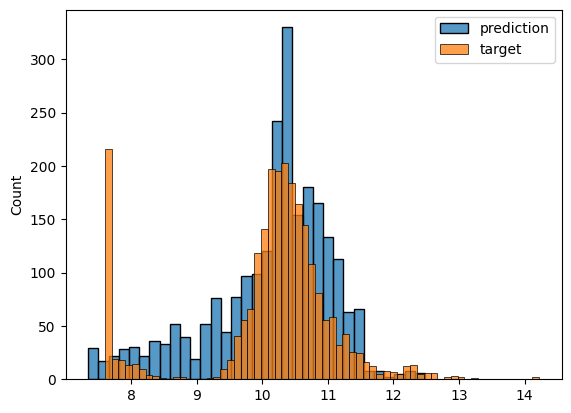

In [80]:
sns.histplot(y_val_pred, label='prediction')
sns.histplot(y_val, label='target')
plt.legend()